<a href="https://colab.research.google.com/github/kashishthakur26/Data-Science/blob/main/text_to_image_search_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Search

SentenceTransformers provides models thhat allow to embed images and text into the sam evectro space. This allows to find similar images as well as to implement image search.

* here we are using, the OpenAI CLIP Model, which was trained on a large set of images and image alt texts.

In [1]:
%pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 124.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.6 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=ea5e910d26999ab644d0fd3483e0ecb1897abc74178faa91ef1fac3d05017d98
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [2]:
from sentence_transformers import SentenceTransformer , util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch
import os

In [3]:
model = SentenceTransformer('clip-ViT-B-32')

In [4]:
!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

--2023-06-26 11:56:55--  https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip
Resolving public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)... 130.83.167.186
Connecting to public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)|130.83.167.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1922426838 (1.8G) [application/zip]
Saving to: ‘unsplash-25k-photos.zip’

unsplash-25k-photos 100%[===================>]   1.79G  33.1MB/s    in 66s     

2023-06-26 11:58:01 (27.8 MB/s) - ‘unsplash-25k-photos.zip’ saved [1922426838/1922426838]



In [5]:
!unzip 'unsplash-25k-photos.zip' -d 'photos'

Streaming output truncated to the last 5000 lines.
  inflating: photos/ErnD0oSB9OE.jpg  
  inflating: photos/CLMlVwtPsI4.jpg  
  inflating: photos/7by0hnrUBP8.jpg  
  inflating: photos/XWARm1Wgg4U.jpg  
  inflating: photos/m_x26CPIjic.jpg  
  inflating: photos/Or9vxPAGtXw.jpg  
  inflating: photos/asr62h5w66w.jpg  
  inflating: photos/oPubZ53L5OE.jpg  
  inflating: photos/AENmGl9JVgs.jpg  
  inflating: photos/kR1Aer8c_WI.jpg  
  inflating: photos/YCniL3n_B7Q.jpg  
  inflating: photos/pg5CVv0FEBU.jpg  
  inflating: photos/jynDaAkI0H8.jpg  
  inflating: photos/QP64OlGcfcQ.jpg  
  inflating: photos/a_nu2fRoqwI.jpg  
  inflating: photos/HeerZLfH4h8.jpg  
  inflating: photos/7TGVEgcTKlY.jpg  
  inflating: photos/fN2pzLWtG6A.jpg  
  inflating: photos/lpxXl5Ssung.jpg  
  inflating: photos/yan5Aj6crIU.jpg  
  inflating: photos/9Phn7Dwz2PM.jpg  
  inflating: photos/9TRaDtl7Z5U.jpg  
  inflating: photos/QeZuoNqtj9I.jpg  
  inflating: photos/lLUbQBbf6Bc.jpg  
  inflating: photos/rmFs3k34JLI.jpg  

In [6]:
img_names = list(glob.glob('photos/*'))[:2000]
print(len(img_names))

2000


In [7]:
img_names[0]

'photos/OYSI5IsVmlk.jpg'

In [8]:
img_embed = model.encode([Image.open(img) for img in img_names] , batch_size=32 , convert_to_tensor =True , show_progress_bar=True)

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [11]:
img_folder = '/photos'

def search(query , k=3):
  query_emd = model.encode([query] , convert_to_tensor=True , show_progress_bar=False)

  hits = util.semantic_search(query_emd , img_embed , top_k=k)[0]
  print(hits)

  print("Query: " , query)
  for hit in hits:
    img_path = img_names[hit['corpus_id']]
    print(img_path)

    im = Image.open(img_path)
    plt.figure()
    plt.imshow(im)
    plt.show()

[{'corpus_id': 351, 'score': 0.2874852418899536}, {'corpus_id': 886, 'score': 0.28616446256637573}, {'corpus_id': 1958, 'score': 0.2861255407333374}]
Query:  man on the mountains
photos/p0QXvtFjdnw.jpg


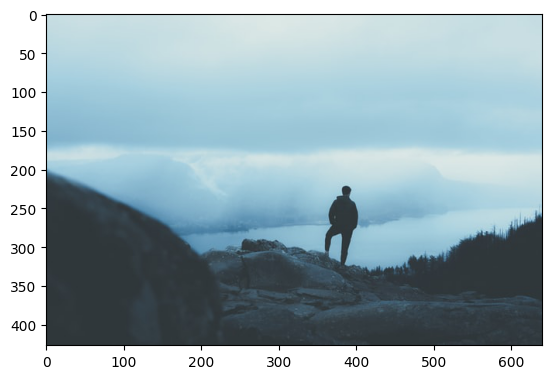

photos/ZFB9S3LNcVg.jpg


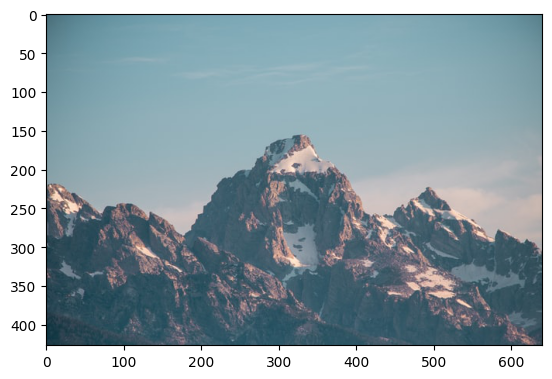

photos/-rIC_DZaUW8.jpg


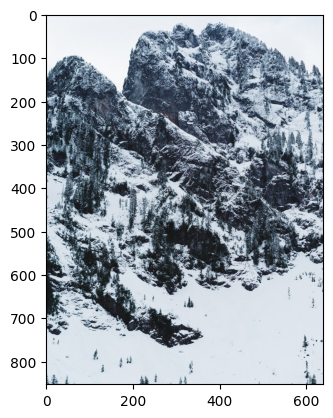

In [12]:
search('man on the mountains')

[{'corpus_id': 1756, 'score': 1.0}, {'corpus_id': 502, 'score': 0.7683790326118469}, {'corpus_id': 1770, 'score': 0.7597433924674988}]
Query:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x427 at 0x7F4EBB432980>
photos/7QyUPe30vqU.jpg


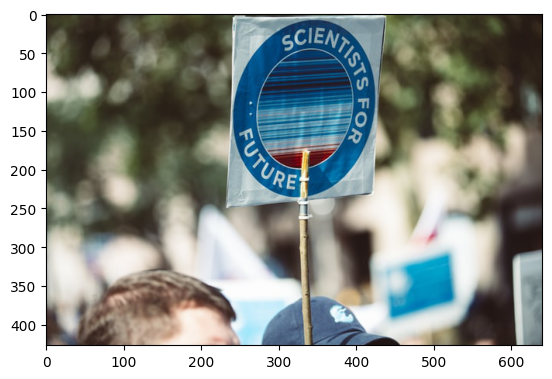

photos/TknRspuNTJs.jpg


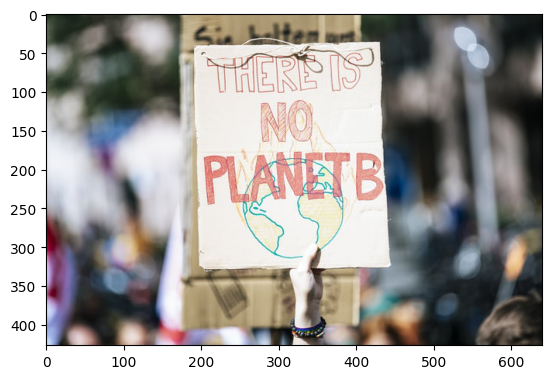

photos/j6O-t8b6fBw.jpg


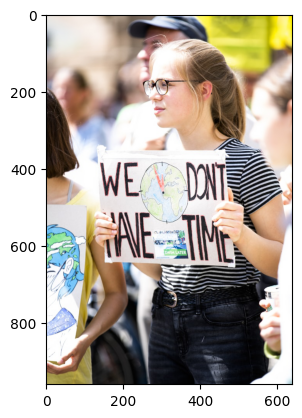

In [13]:
Image.open(img_names[1232])
search(Image.open(img_names[1756]))